In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE,RFECV
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,classification_report

In [2]:
import gdown
import pandas as pd

# Updated file ID for the new dataset from your link
file_id = '1Hze1lgYT6RDfI12hIXaf7HReHxpdiXNm'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'Merged.csv'
gdown.download(url, output=output_file, quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
data = pd.read_csv(output_file)

# Display the first few rows of the dataframe
print(data.head())

# Create a copy of the dataframe
df = data.copy()


Downloading...
From: https://drive.google.com/uc?id=1Hze1lgYT6RDfI12hIXaf7HReHxpdiXNm
To: /content/Merged.csv
100%|██████████| 2.21M/2.21M [00:00<00:00, 205MB/s]

   Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0    1011601  23.0  Female       Chinese         Single                 16.0   
1      10786  34.0  Female  Asian Indian        Married                 17.0   
2      10809  28.0    Male  Asian Indian        Married                 17.0   
3      10856  25.0    Male  Asian Indian         Single                 17.0   
4      10103  60.0  Female  Asian Indian         Single                 17.0   

   Household Size Household Category Full Time Employment  \
0             3.0             Family                   No   
1             3.0             Family                  Yes   
2             2.0             Family                  Yes   
3             1.0              Alone                  Yes   
4             3.0             Family                   No   

  Part Time Employment  ...             Informed  \
0                   No  ...       Not interested   
1                   No  ...  Somewhat interested

In [ ]:
#df = pd.read_csv('Merged.csv')

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
df.head()

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement,Quality of Life
0,1011601,23.0,Female,Chinese,Single,16.0,3.0,Family,No,No,No,No,No,"$0 - $9,999",No,11.0,Yes,Well,Much,Low,Very high,Very close,Not very much,No,Very Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,Yes,0,0,0,Yes,0,0,0,0,0,0,0,Yes,English,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Disagree,Disagree,No,0,No,0,0,0,0,0,Yes,Yes,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0_1.0,0,2.000000,4.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Own,Pretty much,No,Yes,No,Yes,Yes,Yes,No,Not interested,Somewhat dissatisfied,1,1,2,1,Public Transportation,Aware,Not Engaged,8.0
1,10786,34.0,Female,Asian Indian,Married,17.0,3.0,Family,Yes,No,No,No,No,"$70,000 and over",No,1.0,Yes,Very well,Not at all,Very high,High,Very close,Very much,No,Excellent,Excellent,Excellent,Yes,No,No,Yes,Yes,0,No,No,0,No,0,No,No,No,No,Yes,Yes,0,0,Yes,Yes,Yes,0,0,0,0,0,0,English,Yes,Yes,No,No,No,No,No,No,No,No,No,Slightly agree,Agree,No,0,No,0,0,0,0,0,0,0,0,0,Yes,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0_1.0,0,3.000000,3.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,One-family house,Own,Pretty much,No,Yes,Yes,No,Yes,Yes,No,Somewhat interested,Niether satisfied or dissatisfied,1,1,0,0,Car,Aware,Not Engaged,5.0
2,10809,28.0,Male,Asian Indian,Married,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,7.0,No,W

In [5]:
df.head()

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement,Quality of Life
0,1011601,23.0,Female,Chinese,Single,16.0,3.0,Family,No,No,No,No,No,"$0 - $9,999",No,11.0,Yes,Well,Much,Low,Very high,Very close,Not very much,No,Very Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,Yes,0,0,0,Yes,0,0,0,0,0,0,0,Yes,English,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Disagree,Disagree,No,0,No,0,0,0,0,0,Yes,Yes,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0_1.0,0,2.000000,4.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Own,Pretty much,No,Yes,No,Yes,Yes,Yes,No,Not interested,Somewhat dissatisfied,1,1,2,1,Public Transportation,Aware,Not Engaged,8.0
1,10786,34.0,Female,Asian Indian,Married,17.0,3.0,Family,Yes,No,No,No,No,"$70,000 and over",No,1.0,Yes,Very well,Not at all,Very high,High,Very close,Very much,No,Excellent,Excellent,Excellent,Yes,No,No,Yes,Yes,0,No,No,0,No,0,No,No,No,No,Yes,Yes,0,0,Yes,Yes,Yes,0,0,0,0,0,0,English,Yes,Yes,No,No,No,No,No,No,No,No,No,Slightly agree,Agree,No,0,No,0,0,0,0,0,0,0,0,0,Yes,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0_1.0,0,3.000000,3.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,One-family house,Own,Pretty much,No,Yes,Yes,No,Yes,Yes,No,Somewhat interested,Niether satisfied or dissatisfied,1,1,0,0,Car,Aware,Not Engaged,5.0
2,10809,28.0,Male,Asian Indian,Married,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,7.0,No,W

In [6]:
df.shape

(2565, 148)

In [7]:
df.drop(columns='Survey ID',axis=1, inplace=True)

In [8]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Completed',
       'Household Size', 'Household Category', 'Full Time Employment',
       'Part Time Employment', 'Student',
       ...
       'Informed', 'City Effort Satisfaction', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Mode of Transport',
       'Awareness of Services', 'Civic Engagement', 'Quality of Life'],
      dtype='object', length=147)

In [9]:
df_num = df.select_dtypes(include=['int64','float64']).columns

In [10]:
df_num

Index(['Age', 'Education Completed', 'Household Size', 'Duration of Residency',
       'Knowledge', 'Education (AD)', 'Services (AD)', 'Language Barrier (AD)',
       'Aging (AD)', 'Avoidance (AD)', 'Nursing Home (AD)',
       'Advanced Directives', 'Have an Advanced Directive', 'Superstition',
       'Concern for Self & Others (AD)', 'Planning and Preparedness',
       'Fate (AD) and Embarrassing (AD)', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ',
       '3-1-1_9-1-1', 'City-based', 'Non-city-based Ethnic',
       'Non-city-based General', 'Quality of Life'],
      dtype='object')

In [11]:
df_num = ['Age', 'Education Completed', 'Household Size',
       'Duration of Residency', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ']

In [12]:

# Convert all columns except those in df_num to categorical
for col in df.columns:
    if col not in df_num:
        df[col] = df[col].astype('object')

# Check if conversion was successful
print(df.dtypes)


Age                       float64
Gender                     object
Ethnicity                  object
Marital Status             object
Education Completed       float64
                           ...   
Non-city-based General     object
Mode of Transport          object
Awareness of Services      object
Civic Engagement           object
Quality of Life            object
Length: 147, dtype: object


In [13]:
df_cat = df.select_dtypes(include=['object','category']).columns


In [14]:
for i in df_cat:
    print(df[i].value_counts())
    print('\n')


Gender
Female    1421
Male      1144
Name: count, dtype: int64


Ethnicity
Chinese         630
Asian Indian    568
Vietnamese      495
Korean          467
Filipino        262
Other           143
Name: count, dtype: int64


Marital Status
Married                  1717
Single                    717
Living with a partner     102
Other                      29
Name: count, dtype: int64


Household Category
Family                 2035
With Friends            235
Alone                   208
Other                    69
Family with Friends      18
Name: count, dtype: int64


Full Time Employment
No     1435
Yes    1130
Name: count, dtype: int64


Part Time Employment
No     2303
Yes     262
Name: count, dtype: int64


Student
No     2168
Yes     397
Name: count, dtype: int64


Homemaker
No     2310
Yes     255
Name: count, dtype: int64


Retired
No     2247
Yes     318
Name: count, dtype: int64


Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,

In [15]:
len(df_cat) + len(df_num)

147

## RESPONSE VARIABLE

In [16]:
y = df['Quality of Life']

In [17]:
class_counts = y.value_counts()
class_counts

,count
Quality of Life,
8.0,783
7.0,486
9.0,435
10.0,344
6.0,218
5.0,211
4.0,48
3.0,23
2.0,11


<ipython-input-18-bd342538deb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


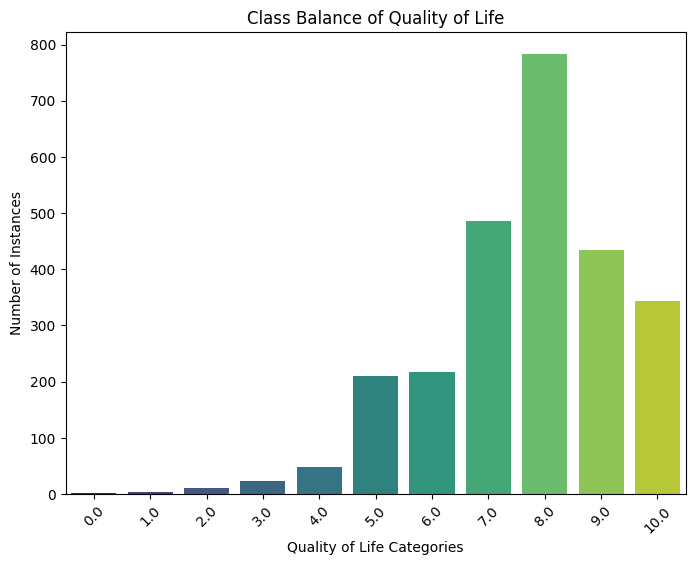

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Balance of Quality of Life')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

#Encode type I
Yes
No  

#Encode type II
Pretty much satisfied     
Very much satisfied        
Not very much satisfied     
Never used                 
Not at all satisfied        

#Encode type III
Never               
Rarely              
Some of the time     
Often               
     
#Encode type IV
Somewhat interested      
Interested               
Not interested            
Very interested           
Not interested at all     


#Encode type V
Niether satisfied or dissatisfied    
Somewhat satisfied                   
Somewhat dissatisfied                
Very satisfied                        
Very dissatisfied                      

#Encode type VI
Good        
Excellent     
Fair        
Poor       

Ordinal
Income
$70,000 and over     1174
$0 - $9,999           245
$30,000 - $39,999     202
$10,000 - $19,999     202
$20,000 - $29,999     194
$60,000 - $69,999     189
$50,000 - $59,999     177
$40,000 - $49,999     175
Name: count, dtype: int64

#Encoding VII
Other Encodings
Value counts for column 'Housing ':
Housing
One-family house                     1382
Apartment/ Townhouse/ Condominium    1006
Two-family house/ duplex               69
Other                                  58
Mobile house                           24
Name: count, dtype: int64

Value counts for column 'Status of Ownership':
Status of Ownership
Own      1350
Rent     1104
Other      78
Name: count, dtype: int64

Value counts for column 'Other Transportation':
Other Transportation
0.0    2512
1.0      26
Name: count, dtype: int64

**Quality of Life variable mapping**

In [19]:
y = df['Quality of Life']

In [20]:
X = df.drop(columns=['Quality of Life'],axis=1)

In [21]:
def recategorize_quality_of_life(value):
    if value in [0, 1, 2, 3]:
        return 0
    elif value in [4, 5, 6, 7]:
        return 1
    elif value in [8, 9, 10]:
        return 2
    else:
        return None

In [22]:
df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)

<ipython-input-22-a175007ff61e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)


In [23]:
y = df['Quality of Life Category']

In [24]:
class_counts_new = df['Quality of Life Category'].value_counts()
class_counts_new

,count
Quality of Life Category,
2,1562
1,963
0,40


<ipython-input-25-1f652ccd53d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)


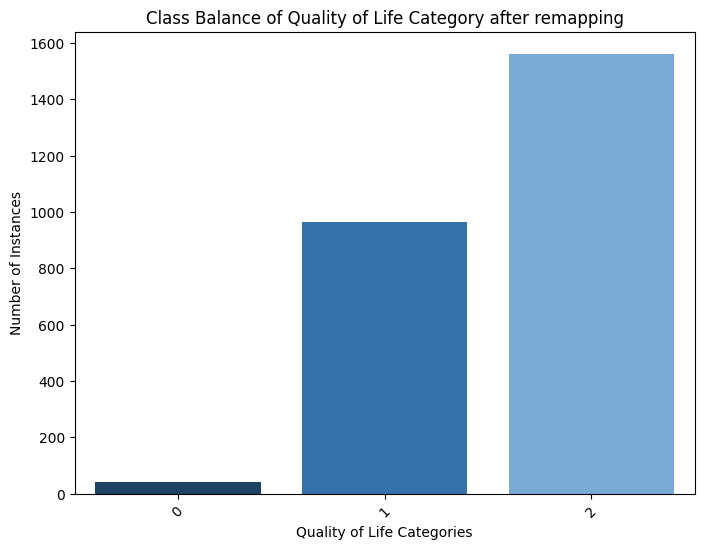

In [25]:
# Define your custom palette with dark blue, dark green, and light green#12436D
custom_palette = sns.color_palette(["#12436D", "#2073BC", "#6BACE6"])  # Dark blue, dark green, light green
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)
plt.title('Class Balance of Quality of Life Category after remapping')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [26]:
cat_df = X.select_dtypes(include=['object'])


In [27]:
from sklearn.model_selection import train_test_split

# X is the feature dataframe and y is the target variable (categorical)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Quality of Life Category'], random_state=42)


## Checking the significance of Categorical variables using Chi_Squared Test

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# Initialize a list to store the results
chi_square_results = []

# Loop through all categorical variables (assuming X is your data and y is your target variable)
for column in X_train[cat_df.columns].columns:
    if X_train[column].dtype == 'object':  # Check if the column is categorical
        # Create a contingency table for the categorical variable and the response (y)
        contingency_table = pd.crosstab(X_train[column], y_train)

        # Perform the Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        # Append the result for the variable
        chi_square_results.append({
            'Variable': column,
            'Chi2 Statistic': chi2,
            'P-Value': p_value,
            'Significant (p < 0.05)': 'Yes' if p_value < 0.05 else 'No'
        })

# Convert the results into a pandas DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Sort the results by p-value for easy identification of significant variables
chi_square_df = chi_square_df.sort_values(by='P-Value')

# Display the table
print(chi_square_df)

                 Variable  Chi2 Statistic        P-Value  \
62  Satisfied With Life 1      607.836078  2.248299e-122   
63  Satisfied With Life 2      576.981938  8.689805e-116   
20  Present Mental Health      411.462298   6.609890e-84   
19         Present Health      284.747768   7.229869e-57   
12       English Speaking      266.544040   1.190316e-54   
..                    ...             ...            ...   
35                 Asthma        0.000000   1.000000e+00   
31                 Cancer        0.000000   1.000000e+00   
33              Hepatitis        0.000000   1.000000e+00   
28          Heart Disease        0.000000   1.000000e+00   
34         Kidney Problem        0.000000   1.000000e+00   

   Significant (p < 0.05)  
62                    Yes  
63                    Yes  
20                    Yes  
19                    Yes  
12                    Yes  
..                    ...  
35                     No  
31                     No  
33                     No  

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

significant_vars = []

for col in X_train[cat_df.columns].columns:
    contingency_table = pd.crosstab(y, X_train[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.05:  # Adjust the significance level as needed
        significant_vars.append(col)

print("Significant variables:", significant_vars)


Significant variables: ['Ethnicity', 'Marital Status', 'Full Time Employment', 'Retired', 'Income', 'US Born', 'Primary Language', 'English Speaking', 'English Difficulties', 'Familiarity with America', 'Familiarity with Ethnic Origin', 'Identify Ethnically', 'Belonging', 'Present Health', 'Present Mental Health', 'Present Oral Health', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'Language', 'users', 'Heal Professionals', 'Health Website', 'Satisfied With Life 1', 'Satisfied With Life 2', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'Knowledge', 'Services (AD)', 'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives', 'Have

## Checking the significance of Numerical variables using Kruskal Wallis

In [30]:
import pandas as pd
from scipy.stats import kruskal

# Initialize an empty list to hold significant variables
significant_num = []

# Loop through each numeric variable and perform the Kruskal-Wallis test
for var in df_num:
    grouped = [X_train[var][y == group] for group in sorted(y.unique())]
    stat, p_value = kruskal(*grouped)

    print(f"Variable: {var}")
    print(f"Kruskal-Wallis test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check significance (using alpha = 0.05)
    if p_value < 0.05:
        print(f"{var} is significantly associated with the ordinal response.\n")
        significant_num.append(var)  # Add to significant_num list
    else:
        print(f"{var} is not significantly associated with the ordinal response.\n")

# Display the significant variables
print("Significant numeric variables:", significant_num)

Variable: Age
Kruskal-Wallis test statistic: 18.196205647126533
P-value: 0.00011187785931608364
Age is significantly associated with the ordinal response.

Variable: Education Completed
Kruskal-Wallis test statistic: 46.39854855722465
P-value: 8.407815957179509e-11
Education Completed is significantly associated with the ordinal response.

Variable: Household Size
Kruskal-Wallis test statistic: 1.1485113714206547
P-value: 0.5631238539906636
Household Size is not significantly associated with the ordinal response.

Variable: Duration of Residency
Kruskal-Wallis test statistic: 46.06715993953099
P-value: 9.923007523987634e-11
Duration of Residency is significantly associated with the ordinal response.

Variable: Family Connectivity Score
Kruskal-Wallis test statistic: 7.775734876683675
P-value: 0.020488993522920763
Family Connectivity Score is significantly associated with the ordinal response.

Variable: Friends Connectivity Score
Kruskal-Wallis test statistic: 3.2625248442120234
P-valu

In [31]:
len(significant_vars)+len(significant_num)

102

## Nominal variables

In [32]:
cat_df = significant_vars

In [33]:

#Encoding Yes and No columns into Nominal type 1
nominal_type1 = []
# Iterate through the columns in cat_df
for col in cat_df:
    if (X[col].isin(['Yes', 'No'])).any():  # Check if any entry is 'Yes' or 'No'
        nominal_type1.append(col)

# Print the Type I encoding columns
print(f'Type I encoding:', nominal_type1)

#Encode categories with Other
nominal_type2 = []
for col in cat_df:
    if (X[col] == 'Other').any():
        nominal_type2.append(col)
print(f'type_nominal_1 encoding:',nominal_type2)


Type I encoding: ['Full Time Employment', 'Retired', 'US Born', 'Primary Language', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'users', 'Heal Professionals', 'Health Website', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'District', 'Nursing Home', 'Smoke Detector', 'Recycle', 'Access to a Computer', 'Mobile Devices']
type_nominal_1 encoding: ['Ethnicity', 'Marital Status', 'Housing ', 'Status of Ownership']


## Ordinal Variables

In [34]:
#Encode type I
type1_columns = []
for col in cat_df:
    if (X[col] == 'Pretty much satisfied').any():
        type1_columns.append(col)
print(f'Type II encoding:',type1_columns)

#Encode type II

type2_columns = []
for col in cat_df:
    if (X[col] == 'Rarely').any():
        type2_columns.append(col)
print(f'Type III encoding:',type2_columns)

#Encode type III
type3_columns = []
for col in cat_df:
    if (X[col] == 'Interested').any():
        type3_columns.append(col)
print(f'Type IV encoding:',type3_columns)

#Encode type IV
type4_columns = []
for col in cat_df:
    if (X[col] == 'Very satisfied').any():
        type4_columns.append(col)
print(f'Type V encoding:',type4_columns)

#Encode type V
type5_columns = []
for col in cat_df:
    if (X[col] == 'Excellent').any():
        type5_columns.append(col)
print(f'Type VI encoding:',type5_columns)



Type II encoding: ['Parks and Recs', 'Libraries', 'Public Safety', 'Airport', 'Austin Energy', 'Court', 'Social Services']
Type III encoding: ['Visit Frequency ']
Type IV encoding: ['Informed']
Type V encoding: ['City Effort Satisfaction']
Type VI encoding: ['Present Health', 'Present Mental Health', 'Present Oral Health', 'Place to Live', 'Raising Children', 'Place to Work', 'Small Businesses ', 'Place to Retire', 'Arts and Culture', 'Safety', 'Traffic', 'Qualtiy of Life', 'Quality of Service']


In [35]:
X_train_new =X_train[significant_vars+significant_num]
X_test_new = X_test[significant_vars+significant_num]

In [36]:
'''from lazypredict.Supervised import LazyClassifier

# Instantiate LazyClassifier with updated arguments
clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)

# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new
models, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)

print(models)'''

'from lazypredict.Supervised import LazyClassifier\n\n# Instantiate LazyClassifier with updated arguments\nclf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)\n\n# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new\nmodels, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)\n\nprint(models)'

In [37]:
ordinal_cols = type1_columns+type2_columns+type3_columns+type4_columns+type5_columns
nominal_cols = nominal_type1+nominal_type2

identified_cols = ordinal_cols+nominal_cols

# Display columns that are not in the exclude list
no_type_cols = X[cat_df].columns[~X[cat_df].columns.isin(identified_cols)]

In [38]:
cat_col = X.select_dtypes(include=['object'])

In [39]:
cat_col [identified_cols]

,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Visit Frequency,Informed,City Effort Satisfaction,Present Health,Present Mental Health,Present Oral Health,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Full Time Employment,Retired,US Born,Primary Language,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Arthritis,Physical Check-up,Dentist Check-up,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,users,Heal Professionals,Health Website,Weakness,Shame,Disappointment,Disclosure,Danger,Recovery,Treatment,Preference,District,Nursing Home,Smoke Detector,Recycle,Access to a Computer,Mobile Devices,Ethnicity,Marital Status,Housing,Status of Ownership
0,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,Never,Not interested,Somewhat dissatisfied,Very Good,Good,Good,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,No,No,No,Yes,No,No,No,No,Yes,0,0,Yes,0,Yes,0,0,0,0,0,0,0,Yes,Yes,Yes,Yes,0,0,0,0,Yes,0,0,0,No,No,Yes,No,Yes,Yes,Chinese,Single,Apartment/ Townhouse/ Condominium,Own
1,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,Yes,Yes,No,No,Yes,Yes,0,0,Yes,Yes,Yes,Yes,Yes,0,0,0,0,0,0,Yes,No,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Married,One-family house,Own
2,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Very Good,Very Good,Very Good,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,No,No,No,No,Yes,No,0,0,Yes,Yes,0,Yes,Yes,0,0,0,Yes,0,0,Yes,No,Yes,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Married,One-family house,Own
3,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,No,No,Yes,No,Yes,Yes,0,0,Yes,Yes,Yes,Yes,Yes,0,0,Yes,0,0,0,Yes,Yes,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Single,One-family house,Own
4,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Interested,Niether satisfied or dissatisfied,Good,Excellent,Very Good,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,No,Yes,No,Yes,No,No,No,Yes,Yes,0,Yes,Yes,Yes,0,Yes,Yes,0,0,0,0,0,0,Yes,Yes,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Single,One-family house,Own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,Very much satisfied,Very much satisfied,Very much satisfied,Pretty much satisfied,Very much satisfied,Pretty much satisfied,Pretty much satisfied,Often,Interested,Somewhat satisfied,Very Good,Excellent,Very Good,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,0,Yes,Yes,Yes,Yes,Yes,0,0,0,0,0,0,Yes,Yes,Yes,0,0,0,0,0,0,0,0,Yes,No,Yes,Yes,Yes,Yes,Other,Single,One-family house,Other
2561,Very much satisfied,Very much satisfied,Very much satisfied,Pretty much satisfied,Not very much satisfied,Not very much satisfied,Pretty much satisfied,Often,Somewhat 

In [40]:
cat_col [no_type_cols]

,Income,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Language,Satisfied With Life 1,Satisfied With Life 2,Knowledge,Services (AD),Language Barrier (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Satisfaction With Housing.,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Awareness of Services,Civic Engagement
0,"$0 - $9,999",Well,Much,Low,Very high,Very close,Not very much,English,Disagree,Disagree,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Pretty much,1,1,2,1,Aware,Not Engaged
1,"$70,000 and over",Very well,Not at all,Very high,High,Very close,Very much,English,Slightly agree,Agree,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,0,0,Aware,Not Engaged
2,"$70,000 and over",Well,Much,High,High,Somewhat close,Not very much,English,Slightly agree,Agree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,0,0,0,Aware,Not Engaged
3,"$50,000 - $59,999",Very well,Not at all,Very high,Low,Not very close,Not very much,English,Strongly agree,Strongly agree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,0,0,Aware,Not Engaged
4,"$70,000 and over",Very well,Not at all,Low,High,Not very close,Not very much,English,Agree,Agree,2.0,0.0,0.0,1.0,1.0,1.0,0.0,Very much,1,1,1,1,Aware,Not Engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,"$30,000 - $39,999",Well,Not much,High,Very high,Somewhat close,Somewhat,Eng_Chinese only,Agree,Agree,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,2,3,Aware,Engaged
2561,"$60,000 - $69,999",Well,Not at all,High,High,Not at all,Somewhat,English,Neither agree or disagree,Agree,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Very much,2,4,2,2,Aware,Engaged
2562,"$10,000 - $19,999",Well,Much,High,High,Somewhat close,Somewhat,English,Agree,Agree,2.0,0.0,0.0,0.0,1.0,1.0,3.0,Very much,1,1,0,0,Aware,Not Engaged
2563,"$10,000 - $19,999",Not well,Much,Low,Low,Somewhat close,Somewhat,English,Agree,Agree,3.0,0.0,0.0,0.0,1.0,1.0,3.0,Pretty much,2,2,2,1,Aware,Engaged


In [41]:
rem = cat_col [no_type_cols].columns
rem

Index(['Income', 'English Speaking', 'English Difficulties',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Belonging', 'Language', 'Satisfied With Life 1',
       'Satisfied With Life 2', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition',
       'Satisfaction With Housing.', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General',
       'Awareness of Services', 'Civic Engagement'],
      dtype='object')

In [42]:
nominal_type3 = ['Language', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Awareness of Services', 'Civic Engagement']

In [43]:
difference = np.setdiff1d(rem, nominal_type3)
cat_col[difference]

,Belonging,English Difficulties,English Speaking,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Income,Satisfaction With Housing.,Satisfied With Life 1,Satisfied With Life 2
0,Not very much,Much,Well,Low,Very high,Very close,"$0 - $9,999",Pretty much,Disagree,Disagree
1,Very much,Not at all,Very well,Very high,High,Very close,"$70,000 and over",Pretty much,Slightly agree,Agree
2,Not very much,Much,Well,High,High,Somewhat close,"$70,000 and over",Pretty much,Slightly agree,Agree
3,Not very much,Not at all,Very well,Very high,Low,Not very close,"$50,000 - $59,999",Pretty much,Strongly agree,Strongly agree
4,Not very much,Not at all,Very well,Low,High,Not very close,"$70,000 and over",Very much,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...
2560,Somewhat,Not much,Well,High,Very high,Somewhat close,"$30,000 - $39,999",Pretty much,Agree,Agree
2561,Somewhat,Not at all,Well,High,High,Not at all,"$60,000 - $69,999",Very much,Neither agree or disagree,Agree
2562,Somewhat,Much,Well,High,High,Somewhat close,"$10,000 - $19,999",Very much,Agree,Agree
2563,Somewhat,Much,Not well,Low,Low,Somewhat close,"$10,000 - $19,999",Pretty much,Agree,Agree


In [44]:
cat_col[difference].columns

Index(['Belonging', 'English Difficulties', 'English Speaking',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Income', 'Satisfaction With Housing.',
       'Satisfied With Life 1', 'Satisfied With Life 2'],
      dtype='object')

In [45]:
for col in difference:
    print(cat_col [col].value_counts())

Belonging
Somewhat         1286
Very much         755
Not very much     441
Not at all         83
Name: count, dtype: int64
English Difficulties
Not at all    796
Not much      723
Much          541
Very much     505
Name: count, dtype: int64
English Speaking
Very well     980
Well          798
Not well      619
Not at all    168
Name: count, dtype: int64
Familiarity with America
High         1249
Low           709
Very high     490
Very low      117
Name: count, dtype: int64
Familiarity with Ethnic Origin
High         1374
Very high     854
Low           288
Very low       49
Name: count, dtype: int64
Identify Ethnically
Somewhat close    1228
Very close        1023
Not very close     286
Not at all          28
Name: count, dtype: int64
Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,999     202
$20,000 - $29,999     195
$60,000 - $69,999     190
$50,000 - $59,999     177
$40,000 - $49,999     177
Name: count, dtype: int64
Satisfactio

In [46]:
type6_columns=['English Difficulties']
type7_columns= ['English Speaking']
type8_columns=['Familiarity with America', 'Familiarity with Ethnic Origin']
type9_columns=['Identify Ethnically']
type10_columns=['Income']
type11_columns= ['Satisfied With Life 1', 'Satisfied With Life 2']
type12_columns=['Belonging']
type13_columns=['Satisfaction With Housing.']

In [47]:
# Define custom orders for each categorical column
custom_orders = {
    'type1_columns': ['Pretty much satisfied', 'Very much satisfied', 'Never used', 'Not very much satisfied', 'Not at all satisfied'],
    'type2_columns': ['Never', 'Rarely', 'Some of the time', 'Often'],
    'type3_columns': ['Not interested at all', 'Not interested', 'Somewhat interested', 'Interested', 'Very interested'],
    'type4_columns': ['Niether satisfied or dissatisfied', 'Somewhat dissatisfied', 'Somewhat satisfied', 'Very dissatisfied', 'Very satisfied'],
    'type5_columns': ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
    'type6_columns': ['Not at all', 'Not much', 'Much', 'Very much'],
    'type7_columns': ['Not at all','Well','Not well','Very well'],
    'type8_columns': ['Very low','Low','High','Very high'],
    'type9_columns': ['Not at all','Not very close', 'Somewhat close', 'Very close'],
    'type10_columns': ['$0 - $9,999', '$10,000 - $19,999', '$20,000 - $29,999',  '$30,000 - $39,999', '$40,000 - $49,999', '$50,000 - $59,999', '$60,000 - $69,999' '$70,000 and over'],
    'type11_columns': ['Strongly disagree','Disagree','Slightly disagree','Neither agree or disagree','Slightly agree','Agree','Strongly agree'],
    'type12_columns': ['Not at all', 'Not very much', 'Somewhat', 'Very much'],
    'type13_columns': ['Not at all', 'Not very much', 'Pretty much', 'Very much']
}


In [48]:
X_test.head(4)

,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement
870,26.0,Male,Asian Indian,Living with a partner,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,4.0,Yes,Well,Much,Low,High,Somewhat close,Somewhat,No,Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,0,0,0,0,0,Yes,Yes,0,0,0,0,0,0,English,No,No,No,No,No,No,No,No,Yes,Yes,No,Slightly agree,Agree,No,Yes,No,0,0,0,0,0,0,0,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0_1.0,0,2.333333,2.666667,1.0,3.0,3.0,3.0,3.0,2.50,3.0,2.0,Good,Good,Good,Good,Good,Good,Fair,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Rent,Pretty much,No,Yes,No,No,Yes,Yes,No,Interested,Niether satisfied or dissatisfied,1,2,2,2,Multiple Modes,Not Aware,Not Engaged
1130,85.0,Female,Asian Indian,Single,5.0,3.0,Family,No,No,No,No,Yes,"$0 - $9,999",No,35.0,Yes,Not well,Much,Low,High,Somewhat close,Somewhat,No,Fair,Fair,Fair,Yes,No,No,Yes,Yes,Yes,No,No,0,No,Yes,No,No,No,No,Yes,0,Yes,0,Yes,Yes,0,0,Yes,0,Yes,Yes,Yes,Gujarati,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Slightly disagree,Neither agree or disagree,No,Yes,No,0,0,0,0,0,Yes,Yes,0,0,Yes,Yes,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2,1,0.0_1.0,0,2.333333,2.000000,2.0,2.0,2.0,2.0,2.5,3.00,3.0,12.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Fair,Pretty much satisfied,Pretty much satisfied,Very much satisfied,Pretty much satisfied,Never used,Pretty much satisfied,Not very much satisfied,No,Never,Rarely,No,One-family house,Own,Pretty much,No,Yes,Yes,Yes,No,No,Yes,Interested,Niether satisfied or dissatisfied,1,2,2,2,Car,Aware,Not Engaged
1438,25.0,Male,Korean,Married,14.0,2.0,Family,Yes,No,No,No,No,"$60,000 - $69,999",

In [49]:
X_test[type2_columns].columns

Index(['Visit Frequency '], dtype='object')

In [50]:
df_nominal = nominal_type1+nominal_type2+nominal_type3

In [51]:
custom_orders['type2_columns']

['Never', 'Rarely', 'Some of the time', 'Often']

In [52]:
X_train.shape

(2052, 146)

In [53]:
X_train.dropna()
X_train.shape

(2052, 146)

In [54]:
df_ordinal = type1_columns + type2_columns+type3_columns+type4_columns+type5_columns+type6_columns+type7_columns+type8_columns+type9_columns+type10_columns+type11_columns+type12_columns+type13_columns
len(df_ordinal) ,len(df_nominal)

(33, 57)

### Handling Imbalance of the response variable using SMOTENC

In [57]:
#from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Identify which columns are categorical (by their indices)
categorical_features = df_nominal + df_ordinal  # Replace with the indices of your label-encoded categorical features

# Apply SMOTENC to the training data
X_train_resampled=X_train_new
y_train_resampled=y_train
#smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
#X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train_new, y_train)

In [58]:
y_train_resampled.value_counts()

,count
Quality of Life Category,
2,1250
1,770
0,32


<ipython-input-59-c64775a1b377>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_resampled.value_counts().index, y=y_train_resampled.value_counts().values, palette=custom_palette)


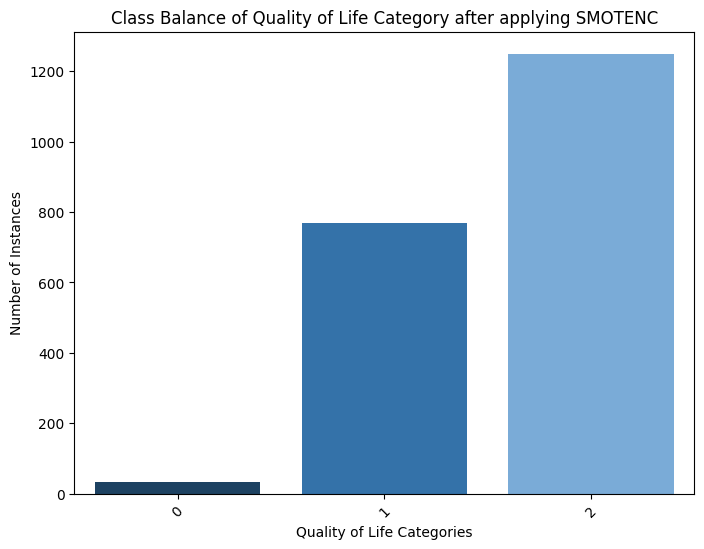

In [59]:
# Define your custom palette with dark blue, dark green, and light green#12436D
custom_palette = sns.color_palette(["#12436D", "#2073BC", "#6BACE6"])  # Dark blue, dark green, light green
plt.figure(figsize=(8, 6))
sns.barplot(x=y_train_resampled.value_counts().index, y=y_train_resampled.value_counts().values, palette=custom_palette)
plt.title('Class Balance of Quality of Life Category after applying SMOTENC')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

## Implementing a Pipeline to preprocess

In [60]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df_num and df_nominal are already defined DataFrames containing the corresponding features
numerical_features = significant_num# Specify the actual numerical columns
nominal_features = df_nominal  # Specify the actual nominal columns

# Numerical transformer (e.g., scaling numerical features)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Nominal transformer (e.g., one-hot encoding categorical nominal features)
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Create the transformers for ordinal columns
ordinal_transformers = [
    (key, OrdinalEncoder(categories=[custom_orders[key] for i in range(len(globals()[key]))], handle_unknown='use_encoded_value', unknown_value=-1), globals()[key])
    for key in custom_orders.keys()
]

# Using ColumnTransformer to apply different preprocessing steps to numerical, ordinal, and nominal categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nominal', nominal_transformer, nominal_features),
        *ordinal_transformers  # Expanding the list of ordinal transformers
    ]
)

# Define the final pipeline to preprocess the data before fitting the model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [61]:
# Apply preprocessing to training data
X_train_preprocessed = pipeline.fit_transform(X_train_resampled)

In [62]:
# Apply preprocessing to testing data
X_test_preprocessed = pipeline.transform(X_test_new)

### Model fitting

In [64]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [66]:
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.2 MB/s eta 0:00:00


In [68]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

# Define classifiers with increased max_iter for LogisticRegression
rfc = RandomForestClassifier()
lgbm = LGBMClassifier(verbose=-1)
etc = ExtraTreesClassifier()
xgb = XGBClassifier()
svc = SVC()
lr = LogisticRegression(max_iter=1000)  # Increased max_iter

# Dictionary of classifiers
clf = {'RandomForest': rfc, 'LightGB': lgbm, 'ExtraTrees': etc, 'XGBBoost': xgb, 'SVC': svc, 'LogisticRegression': lr}

# Cross-validation with scaled data
for name, algo in clf.items():
    score = cross_val_score(algo, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("The cv score of {} is:".format(name), score.mean())


The cv score of RandomForest is: 0.7733997982315589
The cv score of LightGB is: 0.765117797163373
The cv score of ExtraTrees is: 0.7544003323244912
The cv score of XGBBoost is: 0.7695032935730817
The cv score of SVC is: 0.7690119280754851
The cv score of LogisticRegression is: 0.7514616343243723


In [70]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

# Base classifiers
estimators = [
    ('RandomForest', RandomForestClassifier()),
    ('LightGB', LGBMClassifier(verbose=-1)),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('XGBoost', XGBClassifier()),
    ('SVC', SVC(probability=True)),
    ('LogisticRegression', LogisticRegression(max_iter=1000))  # Increased max_iter
]

# Meta-classifier
meta_classifier = LogisticRegression(max_iter=1000)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_classifier,
    cv=5,
    passthrough=False
)

# Evaluate the Stacking Classifier using cross-validation with scaled data
score = cross_val_score(stacking_clf, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')

print("The cross-validation accuracy of the Stacking Classifier is:", score.mean())


The cross-validation accuracy of the Stacking Classifier is: 0.7787632781437303


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.65      0.64      0.65       193
           2       0.78      0.81      0.79       312

    accuracy                           0.73       513
   macro avg       0.48      0.48      0.48       513
weighted avg       0.72      0.73      0.73       513



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


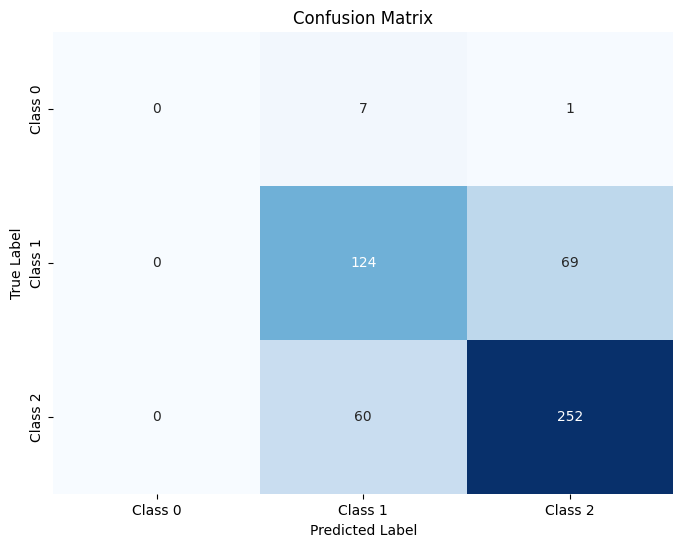

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
# Fit the stacking classifier on the training data
stacking_clf.fit(X_train_preprocessed, y_train_resampled)

# Predict on the test set
y_pred = stacking_clf.predict(X_test_preprocessed)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],  # Change according to your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2'])  # Change according to your class labels

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Fitting  a Random Forest model

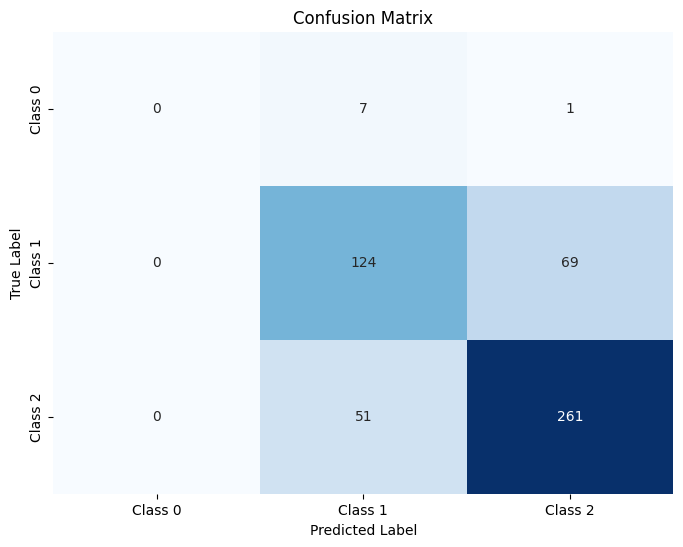

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.68      0.64      0.66       193
           2       0.79      0.84      0.81       312

    accuracy                           0.75       513
   macro avg       0.49      0.49      0.49       513
weighted avg       0.74      0.75      0.74       513



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

rfc = RandomForestClassifier()
model = rfc.fit(X_train_preprocessed,y_train_resampled)
y_pred = model.predict(X_test_preprocessed)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],  # Change according to your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2'])  # Change according to your class labels

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optionally, print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

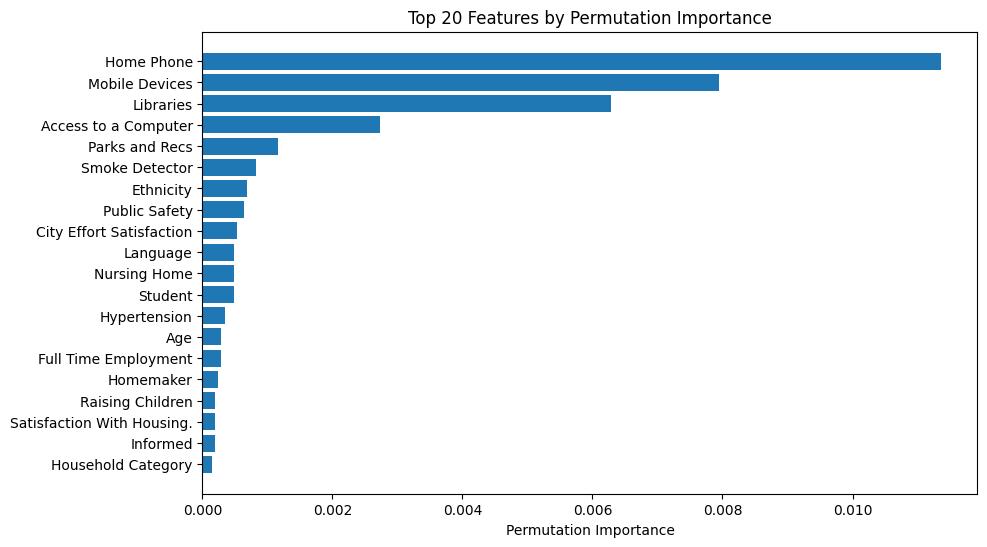

In [73]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
perm_importance = permutation_importance(model, X_train_preprocessed, y_train_resampled, n_repeats=10, random_state=42)

# Sort the feature importances and select the top 20
sorted_idx = perm_importance.importances_mean.argsort()[-20:]  # Get indices for top 20 features

# Plot permutation importance for top 20 variables
plt.figure(figsize=(10, 6))
plt.barh(range(20), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(20), [df.columns[i] for i in sorted_idx])  # Ensure your preprocessed data has column names
plt.xlabel('Permutation Importance')
plt.title('Top 20 Features by Permutation Importance')
plt.show()



In [74]:
# Extract top 20 feature names and their importance scores
top_20_features = [df.columns[i] for i in sorted_idx]
top_20_importances = perm_importance.importances_mean[sorted_idx]

print("Top 20 Features and Their Importance Scores:")
for feature, importance in zip(top_20_features, top_20_importances):
    print(f"{feature}: {importance}")


Top 20 Features and Their Importance Scores:
Household Category: 0.00014619883040936087
Informed: 0.00019493177387914785
Satisfaction With Housing.: 0.00019493177387914785
Raising Children: 0.00019493177387914785
Homemaker: 0.0002436647173489348
Full Time Employment: 0.00029239766081872175
Age: 0.00029239766081872175
Hypertension: 0.0003411306042885087
Student: 0.0004873294346978696
Nursing Home: 0.0004873294346978696
Language: 0.0004873294346978696
City Effort Satisfaction: 0.0005360623781676566
Public Safety: 0.0006335282651072305
Ethnicity: 0.0006822612085770174
Smoke Detector: 0.0008284600389863783
Parks and Recs: 0.001169590643274887
Access to a Computer: 0.002729044834307992
Libraries: 0.00628654970760234
Mobile Devices: 0.007943469785575053
Home Phone: 0.011354775828460052


In [75]:
best_features = ['City Effort Satisfaction', 'Ethnicity', 'Access to a Computer', 'Nursing Home', 'Public Safety', 'Home Phone', 'Libraries', 'Parks and Recs', 'Mobile Devices']

14 Variables with Random Forest Model

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get indices for the top 9 features
top_14_idx = sorted_idx[-14:]

# Select top 9 features for training and testing sets
X_train_top14 = X_train_preprocessed[:, top_14_idx]
X_test_top14 = X_test_preprocessed[:, top_14_idx]

# Fit a model using only the top 9 features
model_top14 = RandomForestClassifier(random_state=42)
model_top14.fit(X_train_top14, y_train_resampled)

# Make predictions and evaluate the model
y_pred_top14 = model_top14.predict(X_test_top14)
print("Accuracy:", accuracy_score(y_test, y_pred_top14))
print("Classification Report:\n", classification_report(y_test, y_pred_top14))


Accuracy: 0.7348927875243665
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.65      0.64      0.65       193
           2       0.78      0.81      0.80       312

    accuracy                           0.73       513
   macro avg       0.48      0.48      0.48       513
weighted avg       0.72      0.73      0.73       513



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 14 Variables with best Stacking Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get indices for the top 9 features
top_14_idx = sorted_idx[-14:]

# Select top 9 features for training and testing sets
X_train_top14 = X_train_preprocessed[:, top_14_idx]
X_test_top14 = X_test_preprocessed[:, top_14_idx]

# Fit a model using only the top 9 features
stacking_clf.fit(X_train_top14, y_train_resampled)

# Make predictions and evaluate the model
y_pred_top14 = stacking_clf.predict(X_test_top14)
print("Accuracy:", accuracy_score(y_test, y_pred_top14))
print("Classification Report:\n", classification_report(y_test, y_pred_top14))


Accuracy: 0.7309941520467836
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.66      0.61      0.63       193
           2       0.77      0.82      0.80       312

    accuracy                           0.73       513
   macro avg       0.48      0.48      0.48       513
weighted avg       0.72      0.73      0.72       513



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
!pip install scikit-learn==1.5.2


## New Section

## Basic Modelss With hyper parameter tuning



In [80]:
X_train=X_train_preprocessed
X_test=X_test_preprocessed
y_train=y_train_resampled
y_test=y_test

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
#from tabulate import tabulate

# Define the model with default parameters
log_reg_model = LogisticRegression(random_state=28, n_jobs=-1)

# Define the hyperparameters to tune
log_reg_param_grid = {
    'C': [0.01, 0.1, 1], # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Type of regularization
    'solver': ['lbfgs', 'liblinear', 'saga'], # Solver to use
    'max_iter': [10, 20, 30],
    'l1_ratio': [0.1, 0.5, 0.7] # Number of iterations

  #      'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
  #  'penalty': ['l1', 'l2', 'elasticnet'], # Type of regularization, excluding 'none' for solvers that do not support it
   # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Solver to use
  #  'max_iter': [100, 200, 300, 500], # Number of iterations
   # 'l1_ratio': [0.1, 0.5, 0.7] # Elastic Net mixing ratio (only for 'saga' solver)
}

# Set up GridSearchCV
log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the best hyperparameters found
log_reg_grid_search.fit(X_train, y_train)
best_log_reg_model = log_reg_grid_search.best_estimator_

# Predict the labels for the test data
log_reg_y_pred = best_log_reg_model.predict(X_test)

# Calculate the accuracy
log_reg_accuracy = round(metrics.accuracy_score(y_test, log_reg_y_pred) * 100, 2)
print("Accuracy score of the tuned Logistic Regression model: ", log_reg_accuracy, "%")

# Calculate the misclassification rate
log_reg_misclassification_rate = round(np.mean(y_test != log_reg_y_pred) * 100, 2)
print("Misclassification rate of the tuned Logistic Regression model: ", log_reg_misclassification_rate, "%")

# Print the classification report
print("\nReport card of the tuned Logistic Regression model: ")
print(metrics.classification_report(y_test, log_reg_y_pred, digits=3))

# Print the best hyperparameters found
print("Best hyperparameters found for the Logistic Regression model: ", log_reg_grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

Accuracy score of the tuned Logistic Regression model:  73.68 %
Misclassification rate of the tuned Logistic Regression model:  26.32 %

Report card of the tuned Logistic Regression model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.669     0.606     0.636       193
           2      0.772     0.837     0.803       312

    accuracy                          0.737       513
   macro avg      0.480     0.481     0.480       513
weighted avg      0.721     0.737     0.728       513

Best hyperparameters found for the Logistic Regression model:  {'C': 0.1, 'l1_ratio': 0.5, 'max_iter': 30, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
#from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=28)

# Define the hyperparameters to tune
param_grid_dt = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [ 'sqrt', 'log2', None]
}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid_dt, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_dt.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_decision_tree_model = grid_search_dt.best_estimator_

# Fit the best model to the training data
best_decision_tree_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_dt = best_decision_tree_model.predict(X_test)

# Calculate the accuracy
accuracy_dt = round(metrics.accuracy_score(y_test, y_pred_dt) * 100, 2)
print("Accuracy score of the tuned Decision Tree model: ", accuracy_dt, "%")

# Calculate the misclassification rate
misclassification_rate_dt = round(np.mean(y_test != y_pred_dt) * 100, 2)
print("Misclassification rate of the tuned Decision Tree model: ", misclassification_rate_dt, "%")

# Print the classification report
print("\nClassification Report of the tuned Decision Tree model: ")
print(metrics.classification_report(y_test, y_pred_dt, digits=3))


# Print the best hyperparameters found
best_params_dt = grid_search_dt.best_params_
print("\nBest hyperparameters found for the Decision Tree model: ", best_params_dt)

# Print the best cross-validation score from the grid search
best_cv_score_dt = grid_search_dt.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_dt * 100, 2), "%")


Accuracy score of the tuned Decision Tree model:  70.18 %
Misclassification rate of the tuned Decision Tree model:  29.82 %

Classification Report of the tuned Decision Tree model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.604     0.617     0.610       193
           2      0.763     0.772     0.768       312

    accuracy                          0.702       513
   macro avg      0.456     0.463     0.459       513
weighted avg      0.691     0.702     0.696       513


Best hyperparameters found for the Decision Tree model:  {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score from the grid search:  74.71 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
# from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=28)

# Define the hyperparameters to tune
param_grid_dt = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid_dt, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_dt.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_decision_tree_model = grid_search_dt.best_estimator_

# Fit the best model to the training data
best_decision_tree_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_dt = best_decision_tree_model.predict(X_test)

# Calculate the accuracy
accuracy_dt = round(metrics.accuracy_score(y_test, y_pred_dt) * 100, 2)
print("Accuracy score of the tuned Decision Tree model: ", accuracy_dt, "%")

# Calculate the misclassification rate
misclassification_rate_dt = round(np.mean(y_test != y_pred_dt) * 100, 2)
print("Misclassification rate of the tuned Decision Tree model: ", misclassification_rate_dt, "%")

# Print the classification report
print("\nClassification Report of the tuned Decision Tree model: ")
print(metrics.classification_report(y_test, y_pred_dt, digits=3))


# Print the best hyperparameters found
best_params_dt = grid_search_dt.best_params_
print("\nBest hyperparameters found for the Decision Tree model: ", best_params_dt)

# Print the best cross-validation score from the grid search
best_cv_score_dt = grid_search_dt.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_dt * 100, 2), "%")


Accuracy score of the tuned Decision Tree model:  70.18 %
Misclassification rate of the tuned Decision Tree model:  29.82 %

Classification Report of the tuned Decision Tree model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.604     0.617     0.610       193
           2      0.763     0.772     0.768       312

    accuracy                          0.702       513
   macro avg      0.456     0.463     0.459       513
weighted avg      0.691     0.702     0.696       513


Best hyperparameters found for the Decision Tree model:  {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score from the grid search:  74.71 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
106 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np


# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=28, n_jobs=-1)

# Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 70, 80],  # Number of trees in the forest
    'max_depth': [None, 3,5,1],  # Maximum depth of the trees
    'min_samples_split': [1,3,5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=random_forest_model, param_grid=param_grid_rf, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_random_forest_model = grid_search_rf.best_estimator_

# Fit the best model to the training data
best_random_forest_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf = best_random_forest_model.predict(X_test)

# Calculate the accuracy
accuracy_rf = round(metrics.accuracy_score(y_test, y_pred_rf) * 100, 2)
print("Accuracy score of the tuned Random Forest model: ", accuracy_rf, "%")

# Calculate the misclassification rate
misclassification_rate_rf = round(np.mean(y_test != y_pred_rf) * 100, 2)
print("Misclassification rate of the tuned Random Forest model: ", misclassification_rate_rf, "%")

# Print the classification report
print("\nClassification Report of the tuned Random Forest model: ")
print(metrics.classification_report(y_test, y_pred_rf, digits=3))


# Print the best hyperparameters found
best_params_rf = grid_search_rf.best_params_
print("\nBest hyperparameters found for the Random Forest model: ", best_params_rf)

# Print the best cross-validation score from the grid search
best_cv_score_rf = grid_search_rf.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_rf * 100, 2), "%")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
326 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Accuracy score of the tuned Random Forest model:  72.51 %
Misclassification rate of the tuned Random Forest model:  27.49 %

Classification Report of the tuned Random Forest model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.650     0.596     0.622       193
           2      0.765     0.824     0.793       312

    accuracy                          0.725       513
   macro avg      0.472     0.473     0.472       513
weighted avg      0.710     0.725     0.716       513


Best hyperparameters found for the Random Forest model:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 80}
Best cross-validation score from the grid search:  77.83 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np


# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the XGBoost model
xgboost_model = XGBClassifier(random_state=28, n_jobs=-1)

# Define the hyperparameters to tune
param_grid_xgb = {

       'n_estimators': [50, 60,70],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1],  # Step size shrinkage
    'max_depth': [1, 3],  # Maximum depth of trees
    'min_child_weight': [1, 2],  # Minimum sum of instance weight needed in a child
    'subsample': [0.9, 1.0],  # Fraction of samples used to fit each base learner
    'colsample_bytree': [0.9, 1.0],  # Fraction of features used to fit each tree
    'gamma': [0, 0.1]  # Minimum loss reduction required to make a further partition

}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgboost_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_xgb.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_xgboost_model = grid_search_xgb.best_estimator_

# Fit the best model to the training data
best_xgboost_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_xgb = best_xgboost_model.predict(X_test)

# Calculate the accuracy
accuracy_xgb = round(metrics.accuracy_score(y_test, y_pred_xgb) * 100, 2)
print("Accuracy score of the tuned XGBoost model: ", accuracy_xgb, "%")

# Calculate the misclassification rate
misclassification_rate_xgb = round(np.mean(y_test != y_pred_xgb) * 100, 2)
print("Misclassification rate of the tuned XGBoost model: ", misclassification_rate_xgb, "%")

# Print the classification report
print("\nClassification Report of the tuned XGBoost model: ")
print(metrics.classification_report(y_test, y_pred_xgb, digits=3))



# Print the best hyperparameters found
best_params_xgb = grid_search_xgb.best_params_
print("\nBest hyperparameters found for the XGBoost model: ", best_params_xgb)

# Print the best cross-validation score from the grid search
best_cv_score_xgb = grid_search_xgb.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_xgb * 100, 2), "%")


Accuracy score of the tuned XGBoost model:  73.1 %
Misclassification rate of the tuned XGBoost model:  26.9 %

Classification Report of the tuned XGBoost model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.656     0.611     0.633       193
           2      0.772     0.824     0.797       312

    accuracy                          0.731       513
   macro avg      0.476     0.478     0.477       513
weighted avg      0.716     0.731     0.723       513


Best hyperparameters found for the XGBoost model:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 70, 'subsample': 1.0}
Best cross-validation score from the grid search:  78.02 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
# from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the AdaBoost model
ada_boost_model = AdaBoostClassifier(random_state=28)

# Define the hyperparameters to tune
param_grid_ada = {
    'n_estimators': [50, 75, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Weight of each new base learner
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm to use for the boosting process
}

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(estimator=ada_boost_model, param_grid=param_grid_ada, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_ada.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_ada_boost_model = grid_search_ada.best_estimator_

# Fit the best model to the training data
best_ada_boost_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_ada = best_ada_boost_model.predict(X_test)

# Calculate the accuracy
accuracy_ada = round(metrics.accuracy_score(y_test, y_pred_ada) * 100, 2)
print("Accuracy score of the tuned AdaBoost model: ", accuracy_ada, "%")

# Calculate the misclassification rate
misclassification_rate_ada = round(np.mean(y_test != y_pred_ada) * 100, 2)
print("Misclassification rate of the tuned AdaBoost model: ", misclassification_rate_ada, "%")

# Print the classification report
print("\nClassification Report of the tuned AdaBoost model: ")
print(metrics.classification_report(y_test, y_pred_ada, digits=3))


# Print the best hyperparameters found
best_params_ada = grid_search_ada.best_params_
print("\nBest hyperparameters found for the AdaBoost model: ", best_params_ada)

# Print the best cross-validation score from the grid search
best_cv_score_ada = grid_search_ada.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_ada * 100, 2), "%")


Accuracy score of the tuned AdaBoost model:  73.88 %
Misclassification rate of the tuned AdaBoost model:  26.12 %

Classification Report of the tuned AdaBoost model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.683     0.580     0.627       193
           2      0.765     0.856     0.808       312

    accuracy                          0.739       513
   macro avg      0.483     0.479     0.478       513
weighted avg      0.722     0.739     0.727       513


Best hyperparameters found for the AdaBoost model:  {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score from the grid search:  77.73 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
#from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the Gradient Boosting model
gradient_boost_model = GradientBoostingClassifier(random_state=28)

# Define the hyperparameters to tune
param_grid_gb = {
    'n_estimators': [50,75],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size shrinking to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
   # 'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used to fit the individual trees
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gradient_boost_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_gb.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_gradient_boost_model = grid_search_gb.best_estimator_

# Fit the best model to the training data
best_gradient_boost_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_gb = best_gradient_boost_model.predict(X_test)

# Calculate the accuracy
accuracy_gb = round(metrics.accuracy_score(y_test, y_pred_gb) * 100, 2)
print("Accuracy score of the tuned Gradient Boosting model: ", accuracy_gb, "%")

# Calculate the misclassification rate
misclassification_rate_gb = round(np.mean(y_test != y_pred_gb) * 100, 2)
print("Misclassification rate of the tuned Gradient Boosting model: ", misclassification_rate_gb, "%")

# Print the classification report
print("\nClassification Report of the tuned Gradient Boosting model: ")
print(metrics.classification_report(y_test, y_pred_gb, digits=3))



# Print the best hyperparameters found
best_params_gb = grid_search_gb.best_params_
print("\nBest hyperparameters found for the Gradient Boosting model: ", best_params_gb)

# Print the best cross-validation score from the grid search
best_cv_score_gb = grid_search_gb.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_gb * 100, 2), "%")


Accuracy score of the tuned Gradient Boosting model:  73.49 %
Misclassification rate of the tuned Gradient Boosting model:  26.51 %

Classification Report of the tuned Gradient Boosting model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.658     0.627     0.642       193
           2      0.780     0.821     0.800       312

    accuracy                          0.735       513
   macro avg      0.479     0.482     0.481       513
weighted avg      0.722     0.735     0.728       513


Best hyperparameters found for the Gradient Boosting model:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score from the grid search:  77.44 %


In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
#from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the MLP model
mlp_model = MLPClassifier(random_state=28, max_iter=1000)

# Define the hyperparameters to tune
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (75,), (50, 50), (75, 75)],  # Number of neurons in each hidden layer
    'activation': ['identity', 'logistic'],  # Activation function for the hidden layer
    #'solver': ['lbfgs', 'sgd', 'adam'],  # Optimization algorithm
    'alpha': [0.0001, 0.001],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'learning_rate_init': [0.001, 0.01]  # Initial learning rate
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_mlp.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_mlp_model = grid_search_mlp.best_estimator_

# Fit the best model to the training data
best_mlp_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_mlp = best_mlp_model.predict(X_test)

# Calculate the accuracy
accuracy_mlp = round(metrics.accuracy_score(y_test, y_pred_mlp) * 100, 2)
print("Accuracy score of the tuned MLP model: ", accuracy_mlp, "%")

# Calculate the misclassification rate
misclassification_rate_mlp = round(np.mean(y_test != y_pred_mlp) * 100, 2)
print("Misclassification rate of the tuned MLP model: ", misclassification_rate_mlp, "%")

# Print the classification report
print("\nClassification Report of the tuned MLP model: ")
print(metrics.classification_report(y_test, y_pred_mlp, digits=3))



# Print the best hyperparameters found
best_params_mlp = grid_search_mlp.best_params_
print("\nBest hyperparameters found for the MLP model: ", best_params_mlp)

# Print the best cross-validation score from the grid search
best_cv_score_mlp = grid_search_mlp.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_mlp * 100, 2), "%")



Accuracy score of the tuned MLP model:  69.2 %
Misclassification rate of the tuned MLP model:  30.8 %

Classification Report of the tuned MLP model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.580     0.674     0.624       193
           2      0.792     0.721     0.755       312

    accuracy                          0.692       513
   macro avg      0.458     0.465     0.460       513
weighted avg      0.700     0.692     0.694       513


Best hyperparameters found for the MLP model:  {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.01}
Best cross-validation score from the grid search:  75.54 %


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
#from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    'p': [1, 2]  # Power parameter for the Minkowski distance metric (1 = Manhattan distance, 2 = Euclidean distance)
}

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_knn.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Fit the best model to the training data
best_knn_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_knn = best_knn_model.predict(X_test)

# Calculate the accuracy
accuracy_knn = round(metrics.accuracy_score(y_test, y_pred_knn) * 100, 2)
print("Accuracy score of the tuned KNN model: ", accuracy_knn, "%")

# Calculate the misclassification rate
misclassification_rate_knn = round(np.mean(y_test != y_pred_knn) * 100, 2)
print("Misclassification rate of the tuned KNN model: ", misclassification_rate_knn, "%")

# Print the classification report
print("\nClassification Report of the tuned KNN model: ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))


# Print the best hyperparameters found
best_params_knn = grid_search_knn.best_params_
print("\nBest hyperparameters found for the KNN model: ", best_params_knn)

# Print the best cross-validation score from the grid search
best_cv_score_knn = grid_search_knn.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_knn * 100, 2), "%")


Accuracy score of the tuned KNN model:  71.93 %
Misclassification rate of the tuned KNN model:  28.07 %

Classification Report of the tuned KNN model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.665     0.544     0.598       193
           2      0.744     0.846     0.792       312

    accuracy                          0.719       513
   macro avg      0.469     0.463     0.463       513
weighted avg      0.702     0.719     0.707       513


Best hyperparameters found for the KNN model:  {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best cross-validation score from the grid search:  74.56 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
#from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the SVM model
svm_model = SVC(random_state=28)

# Define the hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10],  # Kernel coefficient
  #  'degree': [2, 3]  # Degree of the polynomial kernel function (ignored by other kernels)
}

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_svm.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_svm_model = grid_search_svm.best_estimator_

# Fit the best model to the training data
best_svm_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svm = best_svm_model.predict(X_test)

# Calculate the accuracy
accuracy_svm = round(metrics.accuracy_score(y_test, y_pred_svm) * 100, 2)
print("Accuracy score of the tuned SVM model: ", accuracy_svm, "%")

# Calculate the misclassification rate
misclassification_rate_svm = round(np.mean(y_test != y_pred_svm) * 100, 2)
print("Misclassification rate of the tuned SVM model: ", misclassification_rate_svm, "%")

# Print the classification report
print("\nClassification Report of the tuned SVM model: ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))



# Print the best hyperparameters found
best_params_svm = grid_search_svm.best_params_
print("\nBest hyperparameters found for the SVM model: ", best_params_svm)

# Print the best cross-validation score from the grid search
best_cv_score_svm = grid_search_svm.best_score_
print("Best cross-validation score from the grid search: ", round(best_cv_score_svm * 100, 2), "%")


Accuracy score of the tuned SVM model:  71.93 %
Misclassification rate of the tuned SVM model:  28.07 %

Classification Report of the tuned SVM model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         8
           1      0.633     0.617     0.625       193
           2      0.769     0.801     0.785       312

    accuracy                          0.719       513
   macro avg      0.467     0.473     0.470       513
weighted avg      0.706     0.719     0.712       513


Best hyperparameters found for the SVM model:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score from the grid search:  77.05 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#from tabulate import tabulate

# Set a random seed for reproducibility
np.random.seed(28)

# Initialize the Gaussian Naive Bayes classifier without hyperparameter tuning
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_nb = nb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = round(metrics.accuracy_score(y_test, y_pred_nb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Calculate the misclassification rate
misclassification_rate = round(np.mean(y_test != y_pred_nb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print the classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_nb, digits=3))



Accuracy score of this model:  17.74 %
Misclassification rate of this model:  82.26 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.019     1.000     0.038         8
           1      0.704     0.098     0.173       193
           2      0.865     0.205     0.332       312

    accuracy                          0.177       513
   macro avg      0.529     0.435     0.181       513
weighted avg      0.791     0.177     0.267       513

